In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

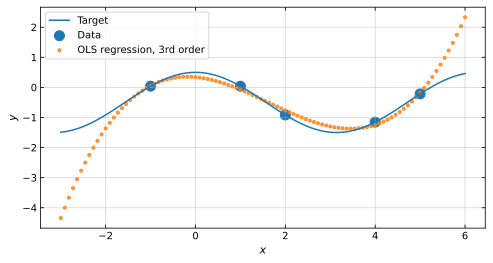

In [2]:
from ipynb.fs.full.ex29_ols_regression import OrdinaryLeastSquares
if __name__ == '__main__':
    target_func = lambda x: np.cos(x) - 0.5
    xs_data = np.array([-1, 1, 2, 4, 5])
    ys_data = target_func(xs_data)
    xrange = np.linspace(-3, 6, 100)
    ols = OrdinaryLeastSquares(order=3)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ols.plot_function(ax, target_func, xrange, label="Target")
    ols.plot_data(ax, xs_data, ys_data, s=100, label="Data")
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xrange, alpha=0.8, s=10, label="OLS regression, 3rd order")
    ax.legend()
    ax.grid(alpha=0.5)

    fig.savefig('ex30_fig1.png')

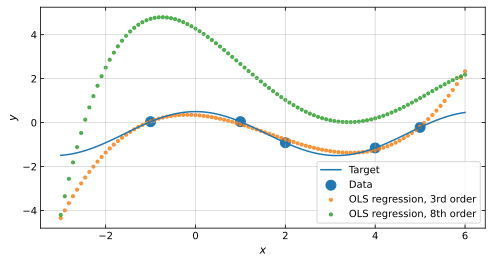

In [3]:
# Now include an 8th order regression in the same plot
if __name__ == '__main__':
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ols.plot_function(ax, target_func, xrange, label="Target")
    ols.plot_data(ax, xs_data, ys_data, s=100, label="Data")
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xrange, alpha=0.8, s=10, label="OLS regression, 3rd order")

    ols.order = 8
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xrange, alpha=0.8, s=10, label="OLS regression, 8th order")
    ax.legend()
    ax.grid(alpha=0.5)

    fig.savefig('ex30_fig2.png')

In [4]:
class RidgeRegression(OrdinaryLeastSquares):
    def __init__(self, lambda_, order=1):
        super().__init__(order)
        if lambda_ < 0:
            raise ValueError("Regularization parameter must be non-negative.")
        self.lambda_ = lambda_

    def fit(self, X, y):
        """
        Fits the ridge model to the data.
        X : array-like, shape (n_samples,)
            The input data.
        y : array-like, shape (n_samples,)
            The target values.
        """
        X = np.asarray(X)
        y = np.asarray(y)

        if self.order < 0:
            X_aug = np.vstack([X**(-i) for i in range(abs(self.order) + 1)]).T
        else:
            X_aug = np.vstack([X**i for i in range(self.order + 1)]).T
        # Ridge estimation using the normal equation
        self.coefficients = np.linalg.inv(X_aug.T @ X_aug + self.lambda_ * np.eye(abs(self.order) + 1)) @ X_aug.T @ y

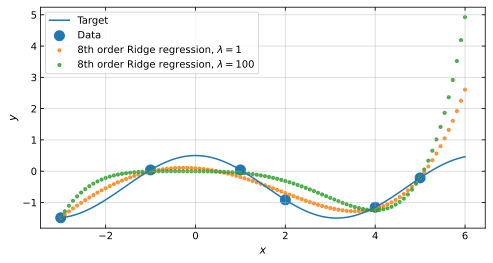

In [5]:
if __name__ == '__main__':
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ax.plot(xrange, target_func(xrange), label="Target")
    ax.grid(alpha=0.5)

    # Define new data and fit 8th order ridge regression for different lambda values
    xs_data = np.array([-3, -1, 1, 2, 4, 5])
    ys_data = target_func(xs_data)
    ax.scatter(xs_data, ys_data, s=100, label="Data")
    lambas = [1, 100]
    for lambda_ in lambas:
        ridge = RidgeRegression(lambda_=lambda_, order=8)
        ridge.fit(xs_data, ys_data)
        ridge.plot_predictions(ax, xrange, alpha=0.8, s=10, label=fr"8th order Ridge regression, $\lambda = {lambda_}$")
    ax.legend()

    fig.savefig('ex30_fig3.png')

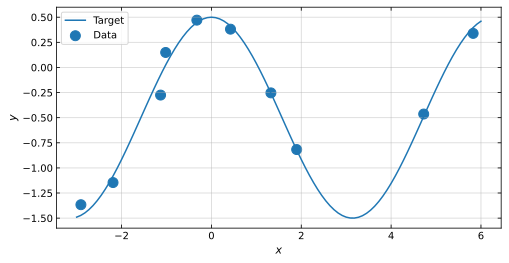

In [6]:
# Data with noise drawn from a normal distribution
if __name__ == '__main__':
    sigma_niose = 0.1
    xs_data = np.random.uniform(-3, 6, 10)
    ys_data = target_func(xs_data) + np.random.normal(0, sigma_niose, len(xs_data))

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ax.plot(xrange, target_func(xrange), label="Target")
    ax.scatter(xs_data, ys_data, s=100, label="Data")
    ax.grid(alpha=0.5)
    ax.legend()

    fig.savefig('ex30_fig4.png')

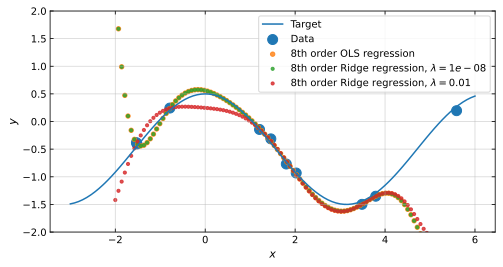

In [8]:
# Use ordinary least squares and ridge regression to fit the function.
# The ridge regression is performed for different values of lambda: 10^-8 and 10^-2
if __name__ == '__main__':
    sigma_niose = 0.1
    xs_data = np.random.uniform(-3, 6, 10)
    ys_data = target_func(xs_data) + np.random.normal(0, sigma_niose, len(xs_data))

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$', ylim=[-2,2])
    xrange = np.linspace(-3, 6, 100)
    ax.plot(xrange, target_func(xrange), label="Target")
    ax.scatter(xs_data, ys_data, s=100, label="Data")

    # Redefining the xrange to exclude end points
    xrange = np.linspace(-2, 5, 100)
    ols = OrdinaryLeastSquares(order=8)
    ols.fit(xs_data, ys_data)
    ols.plot_predictions(ax, xrange, alpha=0.8, s=20, label="8th order OLS regression")

    lambdas = [1e-8, 1e-2]
    for lambda_ in lambdas:
        ridge = RidgeRegression(lambda_=lambda_, order=8)
        ridge.fit(xs_data, ys_data)
        ridge.plot_predictions(ax, xrange, alpha=0.8, s=10, label=fr"8th order Ridge regression, $\lambda = {lambda_}$")

    ax.legend()
    ax.grid(alpha=0.5)

    fig.savefig('ex30_fig5.png')